In [ ]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.utils import resample

# New for Balancing
#%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

# New for Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# New classifier
#%pip install xgboost
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## research questions: 
1. How well does machine learning predict children’s happiness based on mobile phone usage and the level of attention in Burkina Faso?
2. What is the relationship between mobile phone usage and children’s attention levels in a context of how long they have had a mobile phone?

In [2]:
# Load data set
df = pd.read_csv('BF_ML_ready.csv')
df

,ID,Age,Class,Sex_binary,Attention_Score,Happiness_Score,PhoneUse_Score,A1,A2,A3,...,T12,T13,T14,school every day,share phone family,electricity at home,parents rules phone,Phone purpose,Phone_total_months,Has_phone
0,1,15,10,1,2.266667,3.166667,4.583333,1,4,1,...,4,0.0,4.0,0,0,1,0,Communication,4.0,1.0
1,2,14,10,0,3.000000,3.583333,4.250000,1,4,4,...,4,1.0,0.0,0,0,0,0,"School, Games",12.0,1.0
2,3,14,10,1,1.333333,3.000000,1.083333,1,1,1,...,1,0.0,0.0,0,0,0,0,Communication,0.0,0.0
3,4,15,10,1,2.000000,2.916667,3.916667,1,1,4,...,3,1.0,0.0,0,1,0,0,School,12.0,1.0
4,5,16,10,0,2.066667,2.666667,3.833333,3,3,1,...,2,16.0,0.0,0,0,1,0,Communication,192.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,670,22,13,1,1.333333,2.666667,3.166667,1,1,1,...,4,1.0,0.0,0,0,0,0,Communication,12.0,1.0
668,671,18,13,1,1.733333,2.750000,3.583333,1,1,1,...,6,6.0,0.0,0,0,1,0,Music,72.0,1.0
669,672,20,13,1,2.333333,2.333333,3.500000,1,2,1,...,4,3.0,6.0,0,0,0,0,Communication,42.0,1.0
670,673,20,13,1,2.000000,2.833333,2.250000,1,4,1,...,1,0.0,1.0,0,0,0,0,School,1.0,1.0


In [3]:
##dropping all the Happiness items features except for the Happiness average score
df.drop(columns=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12'], inplace=True)
print(df)

      ID  Age  Class  Sex_binary  Attention_Score  Happiness_Score  \
0      1   15     10           1         2.266667         3.166667   
1      2   14     10           0         3.000000         3.583333   
2      3   14     10           1         1.333333         3.000000   
3      4   15     10           1         2.000000         2.916667   
4      5   16     10           0         2.066667         2.666667   
..   ...  ...    ...         ...              ...              ...   
667  670   22     13           1         1.333333         2.666667   
668  671   18     13           1         1.733333         2.750000   
669  672   20     13           1         2.333333         2.333333   
670  673   20     13           1         2.000000         2.833333   
671  674   20     13           1         1.733333         2.333333   

     PhoneUse_Score  A1  A2  A3  ...  T12   T13  T14  school every day  \
0          4.583333   1   4   1  ...    4   0.0  4.0                 0   
1          

In [4]:
#Encoding the average happiness scores into ordinal bins 0,1,2 

# --- Step 1: One-hot encode categorical features ---
df_encoded = pd.get_dummies(df, dtype=int)

# --- Step 2: Encode happiness score into 3 levels ---
df_encoded['Happiness_Level'] = pd.cut(
    df['Happiness_Score'],
    bins=[0.00, 2.00, 3.00, 4.00],
    labels=[0, 1, 2],
    include_lowest=True, right=True
).astype(int)

df_encoded = df_encoded.drop(columns=['Happiness_Score'])

print(df_encoded[['Happiness_Level']].head())
df= df_encoded.copy()
df

   Happiness_Level
0                2
1                2
2                1
3                1
4                1


,ID,Age,Class,Sex_binary,Attention_Score,PhoneUse_Score,A1,A2,A3,A4,...,Phone purpose_communication,Phone purpose_games,Phone purpose_music,Phone purpose_schol,Phone purpose_school,"Phone purpose_school,communication,games,social media,music,other","Phone purpose_school,communication,music,other","Phone purpose_school,social media",Phone purpose_social media,Happiness_Level
0,1,15,10,1,2.266667,4.583333,1,4,1,1,...,0,0,0,0,0,0,0,0,0,2
1,2,14,10,0,3.000000,4.250000,1,4,4,3,...,0,0,0,0,0,0,0,0,0,2
2,3,14,10,1,1.333333,1.083333,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4,15,10,1,2.000000,3.916667,1,1,4,1,...,0,0,0,0,0,0,0,0,0,1
4,5,16,10,0,2.066667,3.833333,3,3,1,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,670,22,13,1,1.333333,3.166667,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
668,671,18,13,1,1.733333,3.583333,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
669,672,20,13,1,2.333333,3.500000,1,2,1,1,...,0,0,0,0,0,0,0,0,0,1
670,673,20,13,1,2.000000,2.250000,1,4,1,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Separating data and target variable 
# target variable
y = df['Happiness_Level']

# data without target variable
X = df.drop(columns='Happiness_Level')
print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)
y.value_counts(normalize=True)
#results require balancing 


      ID  Age  Class  Sex_binary  Attention_Score  PhoneUse_Score  A1  A2  A3  \
0      1   15     10           1         2.266667        4.583333   1   4   1   
1      2   14     10           0         3.000000        4.250000   1   4   4   
2      3   14     10           1         1.333333        1.083333   1   1   1   
3      4   15     10           1         2.000000        3.916667   1   1   4   
4      5   16     10           0         2.066667        3.833333   3   3   1   
..   ...  ...    ...         ...              ...             ...  ..  ..  ..   
667  670   22     13           1         1.333333        3.166667   1   1   1   
668  671   18     13           1         1.733333        3.583333   1   1   1   
669  672   20     13           1         2.333333        3.500000   1   2   1   
670  673   20     13           1         2.000000        2.250000   1   4   1   
671  674   20     13           1         1.733333        5.583333   1   1   4   

     A4  ...  Phone purpose

Happiness_Level
1    0.708333
2    0.250000
0    0.041667
Name: proportion, dtype: float64

In [ ]:

#Fill in all NaN values with 0 
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

# Apply SMOTE only to the training set
df_smote = SMOTE(random_state=42, k_neighbors=3)  
X_train_bal, y_train_bal = df_smote.fit_resample(X_train, y_train)

print("Before balancing:", Counter(y_train))
print("After balancing:", Counter(y_train_bal))



Before balancing: Counter({1: 381, 2: 134, 0: 22})
After balancing: Counter({1: 381, 2: 381, 0: 381})


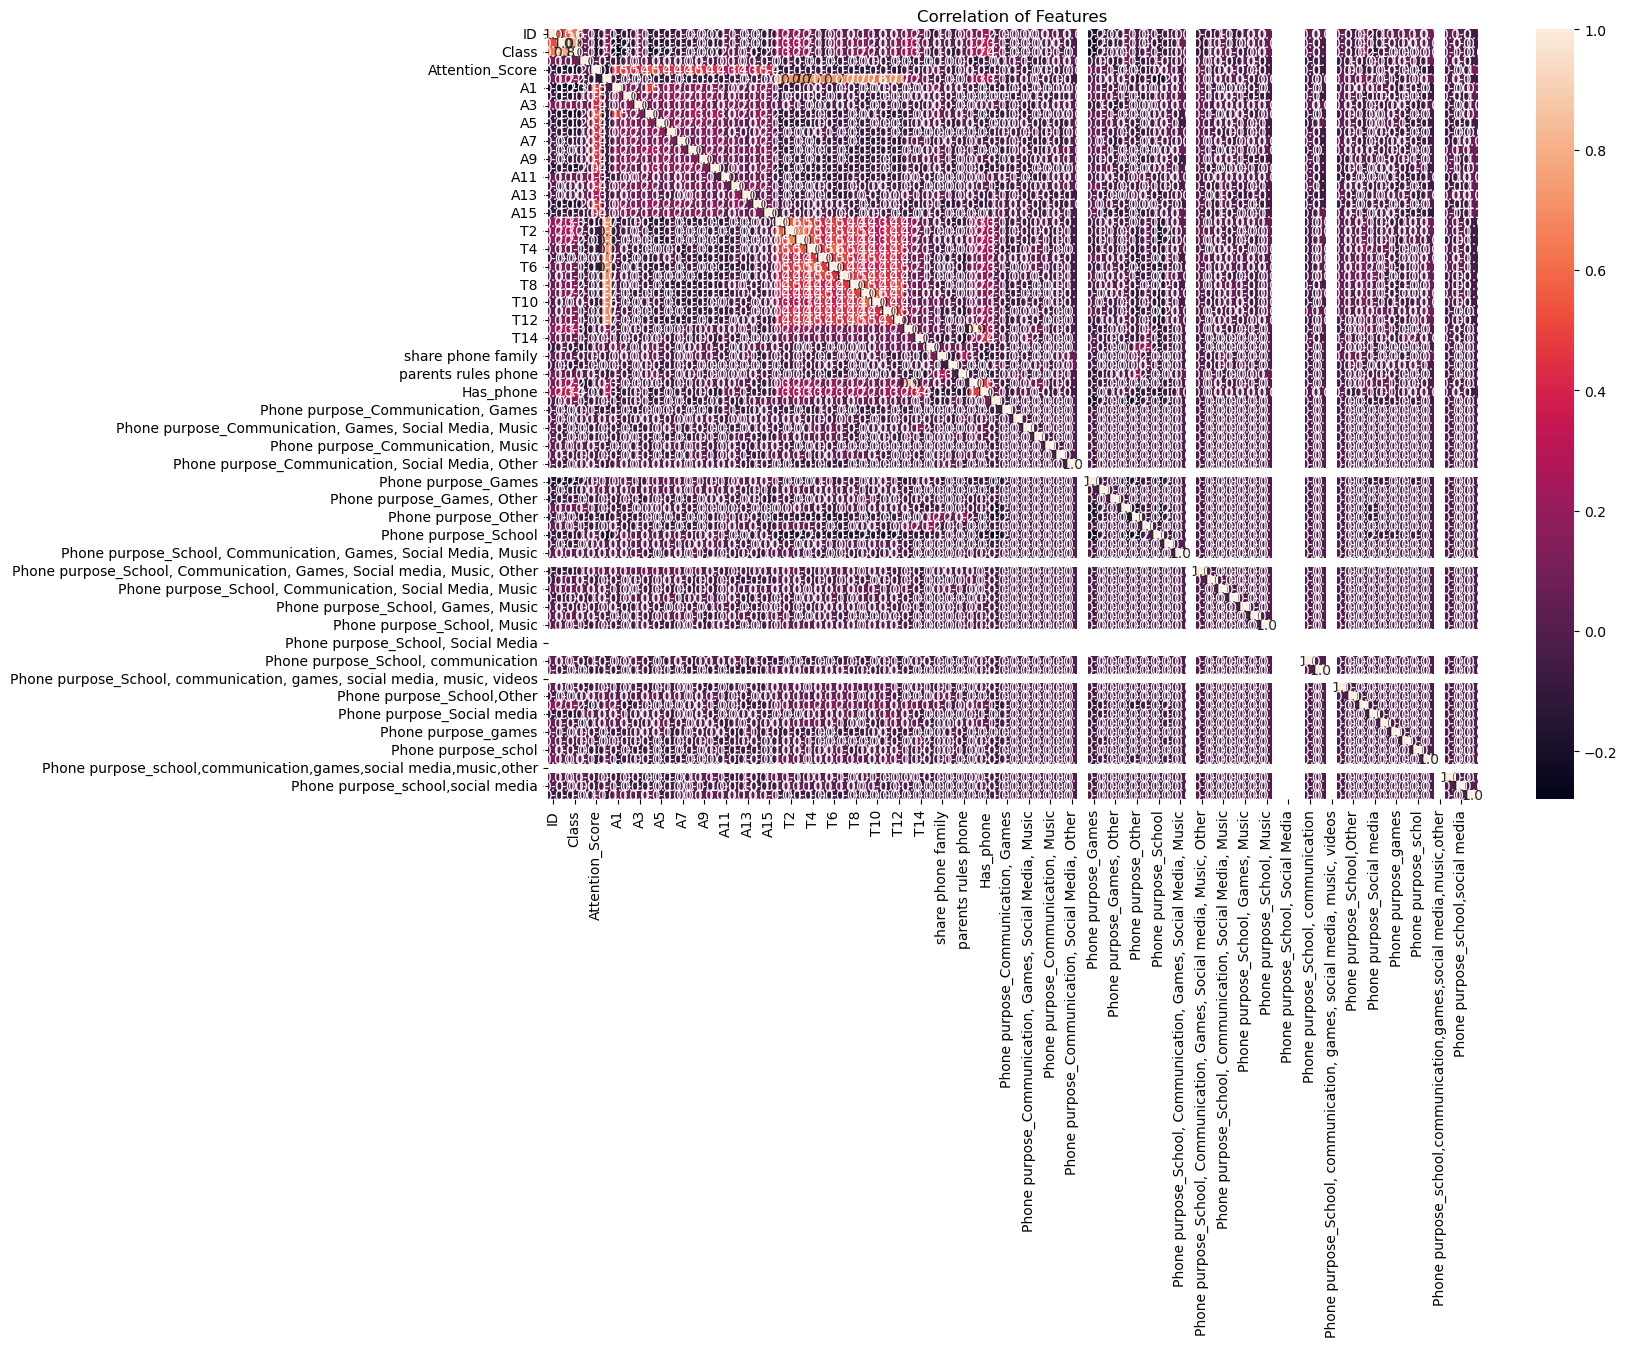

KeyError: 'diagnosis'

In [13]:
plt.figure(figsize=(15, 10))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Correlation of Features')
plt.show()

top_10 = correlation_matrix['diagnosis'].abs().sort_values(ascending=False)[:11].index
df_correlation = X_train[top_10]
df_correlation.head()